Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Bilal Siddiqi"
COLLABORATORS = ""

---

### <font color="brown">Data Management for Data Science</font>
### <font color="brown">Lab 03: Data Collection and Transformation </font>
### <font color="brown">Due Date : Sunday Nov 2, 2025 11.59PM </font>
You can still submit 48 hours late. But you will only have 4 total late days for all assignments, max 2 late days per assignment. Additional late days will be penalized.

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Bilal Siddiqi<br> 
<b>NetID</b>:bms283<br>
<b>Recitation # 5</b>:<br>
<b>Notes to Grader</b> (optional): hi<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://studentconduct.rutgers.edu/processes/academic-integrity">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:     BS

## Important
We will post any updates to this assignment on piazza. if you need clarifications, please post on piazza. We will cover some of the things needed in the recitations and lectures. 

# Problem 1 - Reading and Analyzing Data (30 points)
Reading and analyzing datasets is a fundamental skill in data science, essential for uncovering patterns, trends, and insights hidden within the data. The process begins by importing the dataset into a suitable environment, such as Python using libraries like Pandas. Properly loading the data allows for an initial exploration where data types, missing values, and summary statistics are examined. This stage often involves cleaning and preprocessing to handle inconsistencies, such as dealing with null values or standardizing formats. Once the data is in good shape, various analytical techniques, including descriptive statistics, data visualization, and correlation analysis, help identify relationships and trends. Through this structured approach, datasets transform from raw information into actionable knowledge, guiding decisions and deeper analyses.

In this problem, we will read a file of product data and do some analysis

### Task 1.1 - Read the data file
The data file given at **/srv/shared/Labs/lab03/sales_data_updated.csv** contains data on product sales. First few records of the data file should look like this.

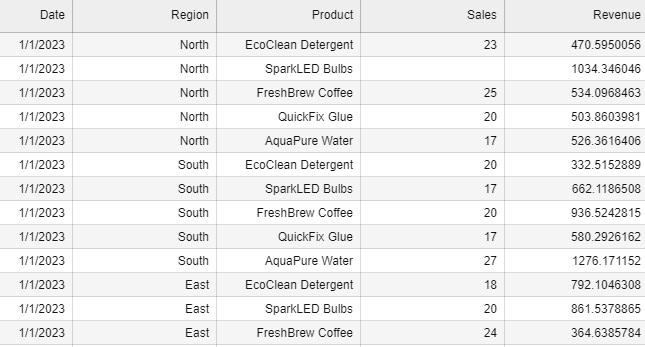

In [3]:
## your code here

import pandas as pd

df = pd.read_csv('/srv/shared/Labs/lab03/sales_data_updated.csv')


## print the first 50 lines of the new file to show that file has been properly read.
print(df.head(50))


        Date Region             Product Sales      Revenue
0   1/1/2023  North  EcoClean Detergent  23.0  470.5950056
1   1/1/2023  North      SparkLED Bulbs   NaN  1034.346046
2   1/1/2023  North    FreshBrew Coffee  25.0  534.0968463
3   1/1/2023  North       QuickFix Glue  20.0  503.8603981
4   1/1/2023  North      AquaPure Water  17.0  526.3616406
5   1/1/2023  South  EcoClean Detergent  20.0  332.5152889
6   1/1/2023  South      SparkLED Bulbs  17.0  662.1186508
7   1/1/2023  South    FreshBrew Coffee  20.0  936.5242815
8   1/1/2023  South       QuickFix Glue  17.0  580.2926162
9   1/1/2023  South      AquaPure Water  27.0  1276.171152
10  1/1/2023   East  EcoClean Detergent  18.0  792.1046308
11  1/1/2023   East      SparkLED Bulbs  20.0  861.5378865
12  1/1/2023   East    FreshBrew Coffee  24.0  364.6385784
13  1/1/2023   East       QuickFix Glue  23.0  404.6059446
14  1/1/2023   East      AquaPure Water   NaN  691.1172026
15  1/1/2023   West  EcoClean Detergent  18.0   671.6612

### Task 1.2 - Finding Missing Values
Finding missing values in a dataset is crucial because they can significantly impact the quality and accuracy of data analysis. Missing values can distort statistical calculations, lead to biased results, and affect the performance of machine learning models. Understanding where and why data is missing helps in deciding how to handle these gaps effectively, whether by imputing values, removing incomplete entries, or using algorithms that can manage missing data. Addressing missing values ensures the analysis remains reliable and that conclusions drawn from the data are well-founded, preventing misleading insights and incorrect decisions.

Write code to find the **percentage** of missing values for each of the columns.

In [4]:
## your code here

Sales_Count = df['Sales'].isnull().sum()
Revenue_Count = df['Revenue'].isnull().sum()
Region_Count = df['Region'].isnull().sum() 
Date_Count = df['Date'].isnull().sum() 
Product_Count = df['Product'].isnull().sum() 

print("Sales missing values: " + str(round(Sales_Count/len(df['Sales']) * 100, 2)) + "%")
print("Revenue missing values: " + str(round(Revenue_Count/len(df['Revenue']) * 100, 2)) + "%")
print("Region missing values: " + str(round(Region_Count/len(df['Region']) * 100, 2)) + "%")
print("Date missing values: " + str(round(Sales_Count/len(df['Sales']) * 100, 2)) + "%")
print("Product missing values: " + str(round(Product_Count/len(df['Product']) * 100, 2)) + "%")


Sales missing values: 6.65%
Revenue missing values: 4.64%
Region missing values: 2.2%
Date missing values: 6.65%
Product missing values: 1.89%


##### Your Analysis 
Based on what you observe, what should we do about the missing values? Justify your statements. Your explanation should be less than 200 words.  

Since such a small percentage of the data has missing values, it wouldn't be a huge detriment to simply delete the rows with missing data. However, if there were important rows that had missing data then replacing the missing values with the median or the most common categorical value would suffice as well.

### Task 1.3 - Finding Outliers
Data outliers are values in a dataset that deviate significantly from the rest of the data points. They are unusually high or low values that do not fit the expected pattern or distribution, often caused by variability in the data, measurement errors, or experimental anomalies. Detecting and addressing outliers is important because they can skew statistical analyses, distort model predictions, and lead to misleading conclusions if not properly handled.

There are some outliers in this data set. Find them, list them and remove them from the data set.

In [4]:

df['Sales'] = pd.to_numeric(df['Sales'].str.replace(r'[^\d.]', '', regex=True))
df = df.dropna()
dfnew = df.assign(zScore= (df['Sales'] - df['Sales'].mean()) / df['Sales'].std())

print("Outliers:\n")
print(dfnew[dfnew['zScore'] > 3])

df_new2 = dfnew[dfnew['zScore'] < 3]
df = df_new2.drop('zScore', axis=1)


Outliers:

            Date Region             Product  Sales      Revenue    zScore
712     2/5/2023   East    FreshBrew Coffee   35.0  808.5571369  3.299489
2444    5/3/2023  North      AquaPure Water   35.0  967.3406927  3.299489
2556    5/8/2023   West      SparkLED Bulbs   34.0  732.4252381  3.077921
2627   5/12/2023  South    FreshBrew Coffee   34.0  763.2924174  3.077921
3426   6/21/2023  South      SparkLED Bulbs   35.0  695.2264542  3.299489
4127   7/26/2023  South    FreshBrew Coffee   40.0  1487.667727  4.407329
4222   7/31/2023  North    FreshBrew Coffee   36.0  1122.054541  3.521057
4731   8/25/2023   East      SparkLED Bulbs   36.0  1093.556434  3.521057
4784   8/28/2023  North      AquaPure Water   37.0  835.6034505  3.742625
5225   9/19/2023  South  EcoClean Detergent   37.0  1160.718751  3.742625
6134   11/3/2023   East      AquaPure Water   37.0  1619.787728  3.742625
6857   12/9/2023   West    FreshBrew Coffee   37.0  1231.206582  3.742625
7066  12/20/2023  South    

### Task 1.4 - Finding Revenue from each Product
First fix the Revenue Column by making revenue numbers only listed up to 2 decimal points. The new dataframe should reflect that. Find the total revenue from each product.



In [6]:
df_2 = df

df_2['Revenue'] = pd.to_numeric(df_2['Revenue'].str.replace(r'[^\d.]', '', regex=True))
df_2['Product'] = df_2['Product'].str.replace(r'^\S+$', '', regex=True)
df_2 = df_2[df_2['Product'].str.strip().astype(bool)]

df_2 = df_2.dropna()

df_2['Revenue'] = df_2['Revenue'].round(2)
df_2.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

Product
SparkLED Bulbs        793921.87
EcoClean Detergent    766961.59
FreshBrew Coffee      765752.97
AquaPure Water        762148.83
QuickFix Glue         734546.65
Name: Revenue, dtype: float64

#### Summarize
Based on observations above, what is the product with the highest revenue, lowest revenue and median revenue.

The product with the highest revenue is SparkLED Bulbs. The product with the lowest revenue is QuickFix Glue. The median revenue is FreshBrew Coffee

### Task 1.5 - Find the Best Product by Region
Finding the best product by region is essential because it helps businesses understand local customer preferences and tailor their marketing strategies accordingly. It enables companies to allocate resources efficiently, focusing on high-demand products in specific areas to maximize sales and revenue. This regional insight also supports inventory management, reducing overstock or shortages by aligning supply with the actual needs of each market.

One business strategy may be to find the best product for each region, so it can be expanded. Write code to find the best product from each region and save it in a csv file. 

In [15]:
import csv
df2 = df

df2['Region'] = df2['Region'].str.replace(r'^(?!North$|South$|East$|West$).*', '', regex=True)
df2['Revenue'] = df_2['Revenue'].round(2)

df2 = df2[df2['Region'].str.strip().astype(bool)]
df_north = df2[df2['Region'] == 'North']
df_south = df2[df2['Region'] == 'South']
df_east = df2[df2['Region'] == 'East']
df_west = df2[df2['Region'] == 'West']

north_best = df2.loc[df_north['Revenue'].idxmax()]
south_best = df2.loc[df_south['Revenue'].idxmax()]
east_best = df2.loc[df_east['Revenue'].idxmax()]
west_best = df2.loc[df_west['Revenue'].idxmax()]

best_products = {
    'Region': ['North', 'South', 'East', 'West'],
    'Product': [north_best['Product'], south_best['Product'], east_best['Product'], west_best['Product']],  
    'Revenue': [north_best['Revenue'], south_best['Revenue'], east_best['Revenue'], west_best['Revenue']]   
}

best_df = pd.DataFrame(best_products)


with open('best_products.csv', 'w') as csvfile:
    best_df.to_csv('best_products.csv', index=False)





### Task 1.6 - Plotting Data by Region and Product
In this task we will plot the data to compare revenue from each product based on region. Read documentation on plotting to determine the best plot to use. Your plot should clearly demonstrate the relation between region and product. 

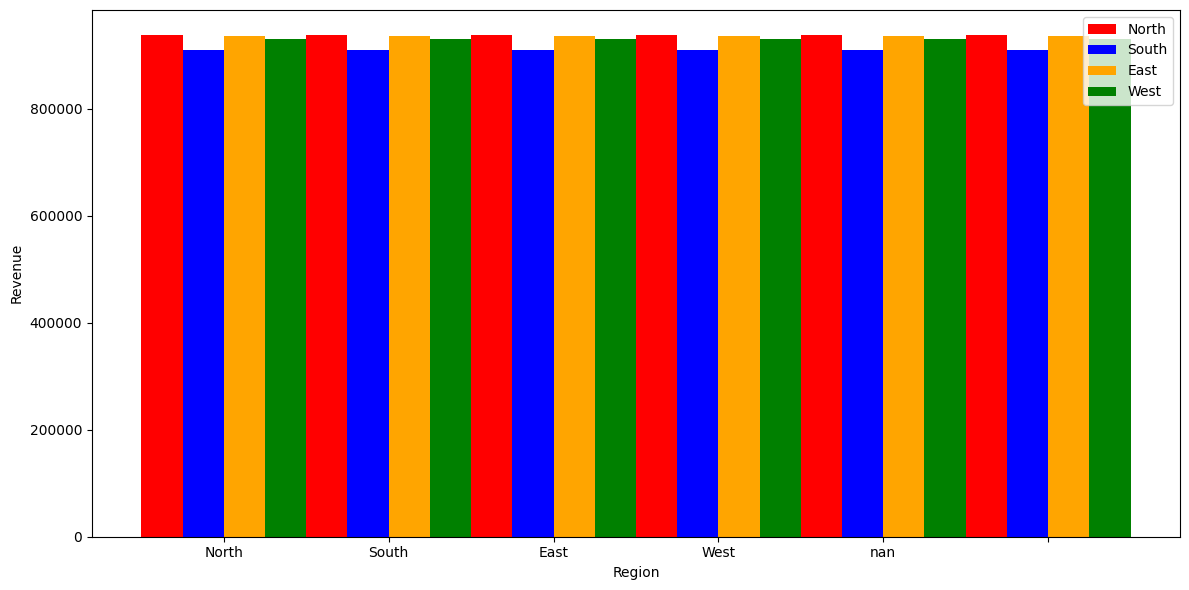

In [28]:
import matplotlib.pyplot as plt
import numpy as np
width = 0.25


x = np.arange(df_north['Product'].nunique())

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, df_north['Revenue'].sum(), width=width, color='red', label='North')
plt.bar(x - 0.5*width, df_south['Revenue'].sum(), width=width, color='blue', label='South')
plt.bar(x + 0.5*width, df_east['Revenue'].sum(), width=width, color='orange', label='East')
plt.bar(x + 1.5*width, df_west['Revenue'].sum(), width=width, color='green', label='West')

plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(x, df['Region'].unique())  
plt.legend()
plt.tight_layout()
plt.show()




# Problem 2 - Cleaning Data (30 points)
Cleaning data is crucial because it removes inaccuracies, inconsistencies, and irrelevant information that can skew analysis results and lead to false conclusions. It ensures that the data used for decision-making is reliable, improving the accuracy of insights and predictive models. Clean data also streamlines the analysis process, saving time and resources by reducing errors and the need for repeated corrections.

In this problem, we will clean this data file using some of the discussions from the lecture.


### Task 2.1 - Missing Values and Bad Records
List the steps you would take to clean this data. Cleaning data involves replacing missing data and/or removing bad data records. Justify all your statements based on the observations you make. You goal is to keep as much data records as possible. Clearly justify your answers.

Firstly, I would drop all the duplicate rows. There is no good reason to have duplicates in a dataset, and it's fairly easy to get rid of them in Pandas as well. Once that is done, I would try to get a percentage of the data that is missing or has inappropriate values. If this percentage is low, I would simply just drop the null values. However, if it's a more prevalent part of the data I would replace the null values with the value that occurs the most often in that column. In the context of this dataset, since the improper values make up less than 10% of the data, it is safe to delete them.

### Task 2.2 - Implement Your Missing Values and Bad Records Stratgey
What is your best strategy for missing values and dealing with bad records? Implement it here and show the new data frame where there should not be any missing values. Write assert statements to justify.

In [36]:
df = df.drop_duplicates()

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Region'] = df['Region'].str.replace(r'^(?!North$|South$|East$|West$).*', '', regex=True)
df['Product'] = df['Product'].str.replace(r'^\S+$', '', regex=True)

df = df[df['Product'].str.strip().astype(bool)]
df = df[df['Region'].str.strip().astype(bool)]
df['Revenue'] = df['Revenue'].round(2)


df = df.dropna(subset=['Date', 'Sales', 'Revenue', 'Region', 'Product'])

print(df)



           Date Region             Product  Sales  Revenue
0    2023-01-01  North  EcoClean Detergent   23.0   470.60
2    2023-01-01  North    FreshBrew Coffee   25.0   534.10
3    2023-01-01  North       QuickFix Glue   20.0   503.86
4    2023-01-01  North      AquaPure Water   17.0   526.36
5    2023-01-01  South  EcoClean Detergent   20.0   332.52
...         ...    ...                 ...    ...      ...
7313 2024-01-01   East       QuickFix Glue   19.0   463.79
7314 2024-01-01   East      AquaPure Water   19.0   591.87
7316 2024-01-01   West      SparkLED Bulbs   21.0   380.00
7317 2024-01-01   West    FreshBrew Coffee   19.0   713.34
7318 2024-01-01   West       QuickFix Glue   21.0   507.94

[5507 rows x 5 columns]


### Task 2.3 - Assert 
Assert that the data set is now clean. There are no bad records or missing values. You need to write assert statements to do this.

In [31]:
assert df.isnull().sum().sum() == 0, "There is a missing value"
assert (df != "???").any().any(), "There is a bad value"
assert (df != "###").any().any(), "There is a bad value"
assert (df != "N/A").any().any(), "There is a bad value"
assert (df != "null").any().any(), "There is a bad value"
assert (df != "junk_value").any().any(), "There is a bad value"

# Problem 3 - Data Transformation (40 pts)
Transforming data from one format to another is important because it makes the data more suitable for analysis, ensuring it aligns with the requirements of specific tools and algorithms. It allows for easier integration and comparison of datasets, enabling more accurate insights across different data sources. Data transformation also helps in extracting meaningful patterns by reshaping the data into formats that highlight key trends and relationships, enhancing the overall analysis.

### Task 3.1 - Pivot the Data Set
Pivoting is a data transformation technique used to reshape data by converting unique values from one column into multiple columns. In this process, the data is reorganized to create a new table where rows become columns, making it easier to analyze trends or comparisons within the dataset. Pivoting is often used to summarize data, allowing for a clearer view of relationships and patterns by grouping and aggregating values.

using the pivoting methods discussed in class, convert this data set from a long format to wide format. **DO NOT** include the time column

In [112]:
df_pivoted = df.drop(columns=['Date'])

df_pivoted = pd.pivot_table(df_pivoted, values='Sales', index='Product', columns='Region', aggfunc='mean')

print(df_pivoted)

Region                   East      North      South       West
Product                                                       
AquaPure Water      19.906897  20.025547  20.343284  19.682657
EcoClean Detergent  19.940741  20.408935  19.951493  20.362007
FreshBrew Coffee    20.312057  20.543726  20.272401  19.895307
QuickFix Glue       20.875458  19.601533  19.843066  20.062731
SparkLED Bulbs      19.655556  20.253472  20.597865  19.870036


### Task 3.2 - Using the Pivoted Data Set
Explain the advantages of having the pivoted data set instead of the original? Explain below.

Having a pivoted data set over the original data set is preferred since it makes it much easier to see the total revenue for each product depending on the region.

### Task 3.3 - One Hot Encoding
One-hot encoding is a technique used to convert categorical data into a numerical format that machine learning algorithms can easily process. It creates a binary column for each category in the dataset, assigning a value of 1 to indicate the presence of that category and 0 otherwise. This transformation helps ensure that the model does not assume any inherent order or priority among the categorical values, treating them as distinct and equally important features.

For analysis, convert the categorical data to numerical data. You need to use one-hot encoding to do this. Display the new data frame after converting using one-hot encoding. This data frame should have only numerical values. 

In [102]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoded = onehot_encoder.fit_transform(df[['Region', 'Product']])

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Region', 'Product']))

df_final = df.drop(['Region', 'Product'], axis=1).reset_index(drop=True)
df_final = pd.concat([df_final, onehot_df], axis = 1)

print(df_final)


           Date  Sales  Revenue  Region_East  Region_North  Region_South  \
0    2023-01-01   23.0   470.60          0.0           1.0           0.0   
1    2023-01-01   25.0   534.10          0.0           1.0           0.0   
2    2023-01-01   20.0   503.86          0.0           1.0           0.0   
3    2023-01-01   17.0   526.36          0.0           1.0           0.0   
4    2023-01-01   20.0   332.52          0.0           0.0           1.0   
...         ...    ...      ...          ...           ...           ...   
5502 2024-01-01   19.0   463.79          1.0           0.0           0.0   
5503 2024-01-01   19.0   591.87          1.0           0.0           0.0   
5504 2024-01-01   21.0   380.00          0.0           0.0           0.0   
5505 2024-01-01   19.0   713.34          0.0           0.0           0.0   
5506 2024-01-01   21.0   507.94          0.0           0.0           0.0   

      Region_West  Product_AquaPure Water  Product_EcoClean Detergent  \
0             

### Task 3.4 - Prediction Model using Linear Regression
A prediction model using linear regression aims to find the best linear relationship between a dependent variable (the outcome) and one or more independent variables (predictors). The model represents this relationship with a straight line, expressed as the equation $ y = mx + b $ for simple linear regression or $ y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n $ for multiple regression, where \(m\) or \(b_n\) are coefficients that determine the slope, and \(b\) or \(b_0\) is the intercept. The goal is to adjust these coefficients so that the predicted values are as close as possible to the actual data points, minimizing the error between the predictions and real observations, allowing the model to forecast future values based on the learned relationship.

In this task, we will create a prediction model to predict the sales given region and product. We will be using the library functions to do this. 

First create a prediction model. We recommend a libarary function - sklearn.linear_model.LinearRegression

In [104]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df_final[['Region_East', 'Region_North', 'Region_South', 'Region_West', 'Product_AquaPure Water', 'Product_EcoClean Detergent', 'Product_FreshBrew Coffee', 'Product_QuickFix Glue', 'Product_SparkLED Bulbs']]
Y = df_final[['Sales']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)










### Task 3.5 - Predict
Based on the prediction model, predict the sales for the following product from a region.

1. North and SparkLED Bulbs

2. East	FreshBrew Coffee

3. West	EcoClean Detergent

In [129]:





north_data = {'Region_East': [0], 'Region_North': [1], 'Region_South': [0], 'Region_West': [0], 'Product_AquaPure Water': [0], 'Product_EcoClean Detergent': [0], 'Product_FreshBrew Coffee': [0], 'Product_QuickFix Glue': [0], 'Product_SparkLED Bulbs': [1]}
X_North = pd.DataFrame(north_data)
df_north = model.predict(X_North)

east_data = {'Region_East': [1], 'Region_North': [0], 'Region_South': [0], 'Region_West': [0], 'Product_AquaPure Water': [0], 'Product_EcoClean Detergent': [0], 'Product_FreshBrew Coffee': [1], 'Product_QuickFix Glue': [0], 'Product_SparkLED Bulbs': [0]}
X_East = pd.DataFrame(east_data)
df_east = model.predict(X_East)

west_data = {'Region_East': [0], 'Region_North': [0], 'Region_South': [0], 'Region_West': [1], 'Product_AquaPure Water': [0], 'Product_EcoClean Detergent': [1], 'Product_FreshBrew Coffee': [0], 'Product_QuickFix Glue': [0], 'Product_SparkLED Bulbs': [0]}
X_West = pd.DataFrame(west_data)
df_west = model.predict(X_West)

print("North and SparkLED Bulbs: " + str(df_north[0][0]))
print("East and FreshBrew Coffee: " + str(df_east[0][0]))
print("West and EcoClean Detergent: " + str(df_west[0][0]))




North and SparkLED Bulbs: 20.286189375677168
East and FreshBrew Coffee: 20.2764368819331
West and EcoClean Detergent: 19.85768440810937


### Task 3.6 - How Good is the Prediction Model?
Compare the results from the prediction model with average sales from that region for that product. What do you observe?

In [ ]:
The model is accurate. The predicted numbers are very close to the mean, mostly only off by a hundredth of a percent.

### Submission Instructions
Rename the lab as netID_Lab03.ipynb and submit to codebench. (eg: adg133_Lab03.ipynb)